In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score



In [2]:
# Load the dataset
data = pd.read_csv('feature_only.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gas       308 non-null    int64
 1   CO        308 non-null    int64
 2   hydrogen  308 non-null    int64
dtypes: int64(3)
memory usage: 7.3 KB


mndefinisikan fitur data dan melihat korelasi antar fitur

In [3]:
features = ['gas','CO','hydrogen']
# Separating out the features
data_features = data[features]
data_corr = data_features.corr()
data_corr

,gas,CO,hydrogen
gas,1.000000,-0.051556,0.515683
CO,-0.051556,1.000000,0.284142
hydrogen,0.515683,0.284142,1.000000


In [23]:
data_features.head()

,gas,CO,hydrogen
0,211,148,336
1,208,146,334
2,208,147,335
3,208,147,335
4,207,147,334


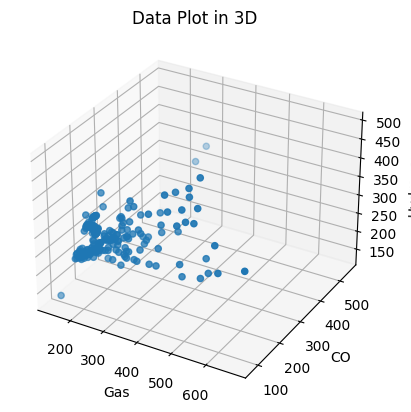

In [4]:
#ploting raw data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['gas'], data['CO'], data['hydrogen'])
ax.set_xlabel('Gas')
ax.set_ylabel('CO')
ax.set_zlabel('Hydrogen')
ax.set_title('Data Plot in 3D')
plt.show()



Normalisasi data, karena di dapat range data untuk tiap fitur berbeda

In [5]:
#menormalisasi data
scaler = StandardScaler()
# Fit on training set only.
data_scaled = scaler.fit_transform(data_features[features])
# Transform both the training set and the test set.
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
X = data_scaled
X.head()

,gas,CO,hydrogen
0,-0.577178,0.572842,0.688911
1,-0.613286,0.522316,0.636070
2,-0.613286,0.547579,0.662490
3,-0.613286,0.547579,0.662490
4,-0.625322,0.547579,0.636070


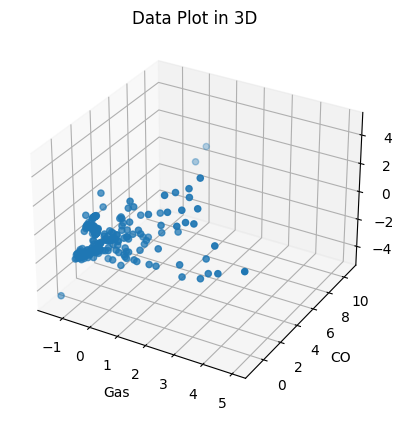

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['gas'], X['CO'], X['hydrogen'])
ax.set_xlabel('Gas')
ax.set_ylabel('CO')
ax.set_zlabel('Hydrogen')
ax.set_title('Data Plot in 3D')
plt.show()

Mencari nilai K terbaik dari nilai silhoute
Nilai silhoutte

In [7]:
k = None
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        # Create a KMeans instance with k clusters: model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker="o")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score for Optimal K")
    plt.show()

c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

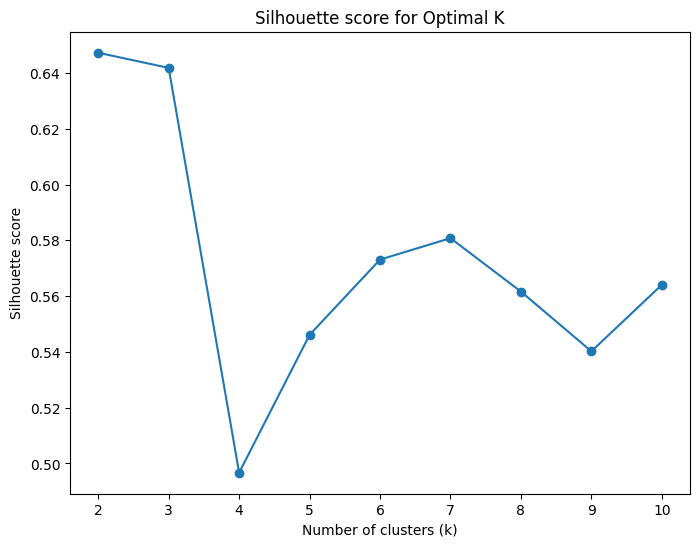

In [37]:
k= find_optimal_k_silhouette(X, 10)

In [8]:
# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataset
X['cluster'] = labels

# Print the resulting clusters
print(X['cluster'].value_counts())

c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    271
0     37
Name: count, dtype: int64


In [30]:
X['cluster'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 308 entries, 0 to 307
Series name: cluster
Non-Null Count  Dtype
--------------  -----
308 non-null    int32
dtypes: int32(1)
memory usage: 1.3 KB


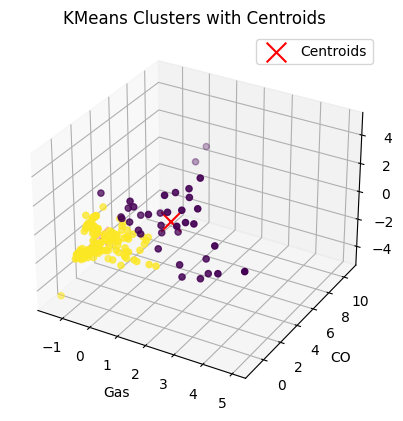

In [9]:
# Plot the clusters with centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['gas'], X['CO'], X['hydrogen'], c=X['cluster'], cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=200, color='red', label='Centroids')
ax.set_xlabel('Gas')
ax.set_ylabel('CO')
ax.set_zlabel('Hydrogen')
ax.set_title('KMeans Clusters with Centroids')
ax.legend()

plt.show()


In [10]:
# Evaluate clustering performance using Adjusted Rand Index (from -1 to 1 interval)
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(X['cluster'], labels)
print("Adjusted Rand Index:", score)


Adjusted Rand Index: 1.0


In [11]:
# Calculate silhouette score for gas
#silhoette adalah jarak rata-rata antara data point dengan cluster lain
silhouette_avg_r = silhouette_score(X, labels)
print(f"Silhouette Score for model: {silhouette_avg_r}")

Silhouette Score for model: 0.6472576741977579
